**This notebook is an exercise in the [Data Visualization](https://www.kaggle.com/learn/data-visualization) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/bar-charts-and-heatmaps).**

---


In this exercise, you will use your new knowledge to propose a solution to a real-world scenario.  To succeed, you will need to import data into Python, answer questions using the data, and generate **bar charts** and **heatmaps** to understand patterns in the data.

## Scenario

You've recently decided to create your very own video game!  As an avid reader of [IGN Game Reviews](https://www.ign.com/reviews/games), you hear about all of the most recent game releases, along with the ranking they've received from experts, ranging from 0 (_Disaster_) to 10 (_Masterpiece_).

![ex2_ign](https://storage.googleapis.com/kaggle-media/learn/images/Oh06Fu1.png)

You're interested in using [IGN reviews](https://www.ign.com/reviews/games) to guide the design of your upcoming game.  Thankfully, someone has summarized the rankings in a really useful CSV file that you can use to guide your analysis.

## Setup

Run the next cell to import and configure the Python libraries that you need to complete the exercise.

In [3]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


The questions below will give you feedback on your work. Run the following cell to set up our feedback system.

In [4]:
# Set up code checking
import os
if not os.path.exists("../input/ign_scores.csv"):
    os.symlink("../input/data-for-datavis/ign_scores.csv", "../input/ign_scores.csv") 
from learntools.core import binder
binder.bind(globals())
from learntools.data_viz_to_coder.ex3 import *
print("Setup Complete")

Setup Complete


## Step 1: Load the data

Read the IGN data file into `ign_data`.  Use the `"Platform"` column to label the rows.

In [8]:
# Path of the file to read
ign_filepath = "../input/ign_scores.csv"

# Fill in the line below to read the file into a variable ign_data
ign_data = pd.read_csv(ign_filepath, index_col="Platform")

# Run the line below with no changes to check that you've loaded the data correctly
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [9]:
# Lines below will give you a hint or solution code
#step_1.hint()
step_1.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
ign_data = pd.read_csv(ign_filepath, index_col="Platform")
```

## Step 2: Review the data

Use a Python command to print the entire dataset.

In [10]:
# Print the data
print(ign_data) # Your code here

                        Action  Action, Adventure  Adventure  Fighting  \
Platform                                                                 
Dreamcast             6.882857           7.511111   6.281818  8.200000   
Game Boy Advance      6.373077           7.507692   6.057143  6.226316   
Game Boy Color        6.272727           8.166667   5.307692  4.500000   
GameCube              6.532584           7.608333   6.753846  7.422222   
Nintendo 3DS          6.670833           7.481818   7.414286  6.614286   
Nintendo 64           6.649057           8.250000   7.000000  5.681250   
Nintendo DS           5.903608           7.240000   6.259804  6.320000   
Nintendo DSi          6.827027           8.500000   6.090909  7.500000   
PC                    6.805791           7.334746   7.136798  7.166667   
PlayStation           6.016406           7.933333   6.313725  6.553731   
PlayStation 2         6.467361           7.250000   6.315152  7.306349   
PlayStation 3         6.853819        

The dataset that you've just printed shows the average score, by platform and genre.  Use the data to answer the questions below.

In [79]:
# Fill in the line below: What is the highest average score received by PC games,
# for any genre?
high_score = ign_data.loc["PC", :].max()
# Fill in the line below: On the Playstation Vita platform, which genre has the 
# lowest average score? Please provide the name of the column, and put your answer 
# in single quotes (e.g., 'Action', 'Adventure', 'Fighting', etc.)
worst_genre = f'{ign_data.loc["PlayStation Vita", :].sort_values(ascending=True).index[0]}'
print(worst_genre)

step_2.check()

Simulation


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [ ]:
# Lines below will give you a hint or solution code
#step_2.hint()
#step_2.solution()

## Step 3: Which platform is best?

Since you can remember, your favorite video game has been [**Mario Kart Wii**](https://www.ign.com/games/mario-kart-wii), a racing game released for the Wii platform in 2008.  And, IGN agrees with you that it is a great game -- their rating for this game is a whopping 8.9!  Inspired by the success of this game, you're considering creating your very own racing game for the Wii platform.

#### Part A

Create a bar chart that shows the average score for **racing** games, for each platform.  Your chart should have one bar for each platform. 

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

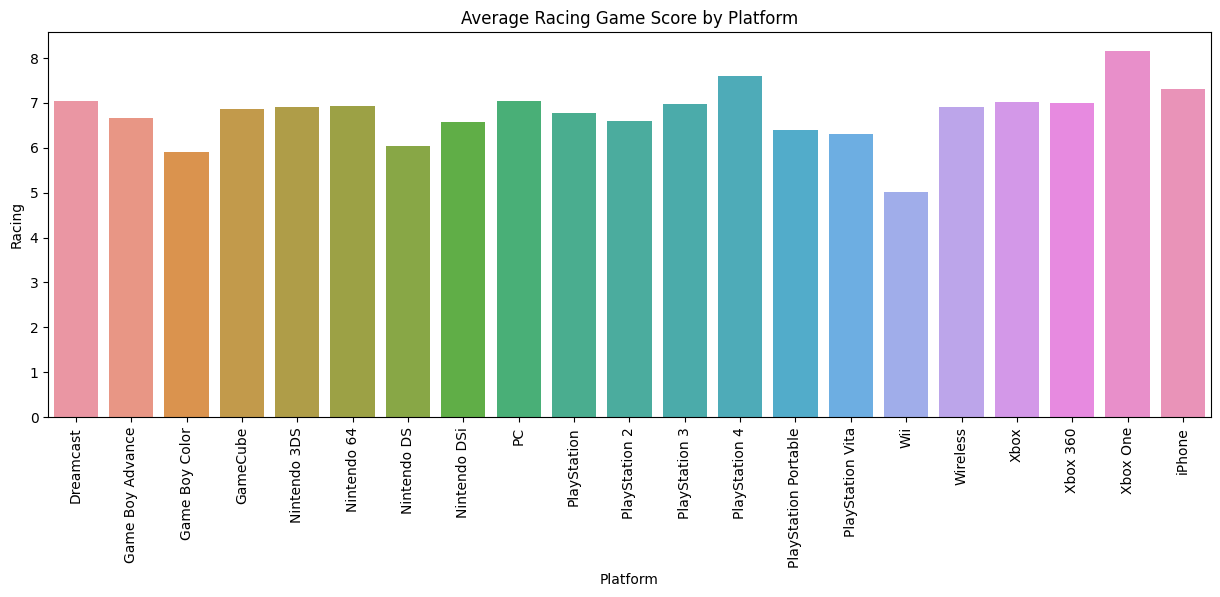

In [116]:
# Bar chart showing average score for racing games by platform
plt.figure(figsize=(15, 5)) # Your code here
plt.title("Average Racing Game Score by Platform")
sns.barplot(data=ign_data, y="Racing", x=ign_data.index)
plt.xticks(rotation=90)
# Check your answer
step_3.a.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Set the width and height of the figure
plt.figure(figsize=(8, 6))
# Bar chart showing average score for racing games by platform
sns.barplot(x=ign_data['Racing'], y=ign_data.index)
# Add label for horizontal axis
plt.xlabel("")
# Add label for vertical axis
plt.title("Average Score for Racing Games, by Platform")

```

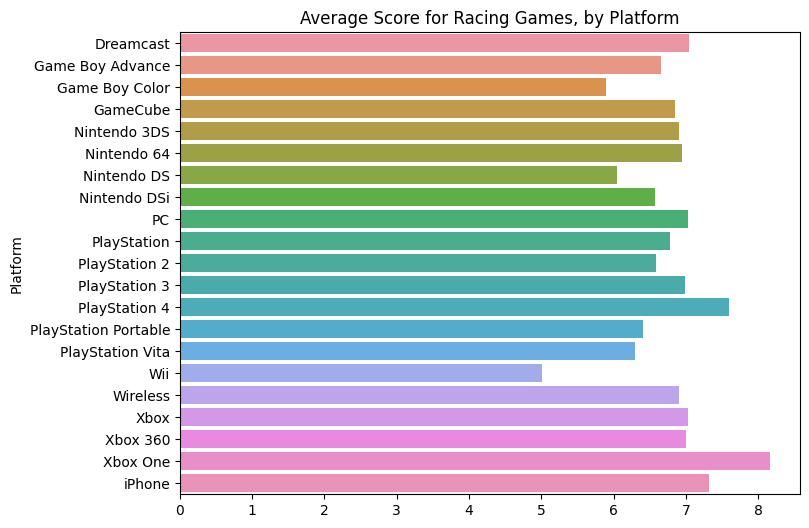

In [117]:
# Lines below will give you a hint or solution code
#step_3.a.hint()
step_3.a.solution_plot()

#### Part B

Based on the bar chart, do you expect a racing game for the **Wii** platform to receive a high rating?  If not, what gaming platform seems to be the best alternative?

In [ ]:
#step_3.b.hint()

In [118]:
# Check your answer (Run this code cell to receive credit!)
step_3.b.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> Based on the data, we should not expect a racing game for the Wii platform to receive a high rating.  In fact, on average, racing games for Wii score lower than any other platform.  Xbox One seems to be the best alternative, since it has the highest average ratings.

## Step 4: All possible combinations!

Eventually, you decide against creating a racing game for Wii, but you're still committed to creating your own video game!  Since your gaming interests are pretty broad (_... you generally love most video games_), you decide to use the IGN data to inform your new choice of genre and platform.

#### Part A

Use the data to create a heatmap of average score by genre and platform.  

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

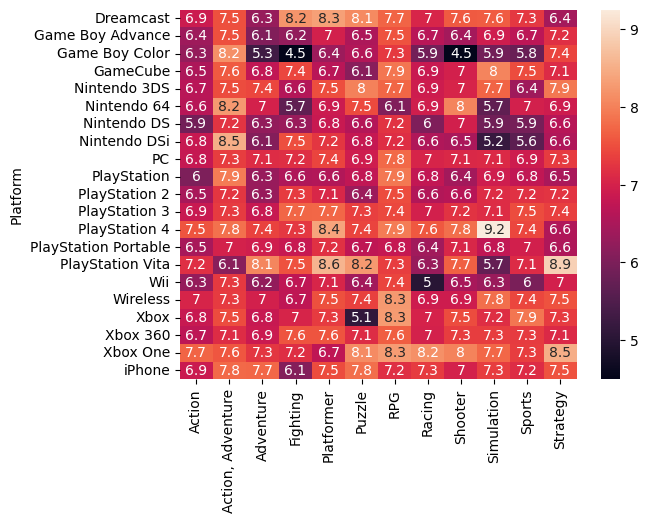

In [129]:
# Heatmap showing average game score by platform and genre
sns.heatmap(data=ign_data, annot=True) # Your code here

# Check your answer
step_4.a.check()

In [ ]:
# Lines below will give you a hint or solution code
#step_4.a.hint()
#step_4.a.solution_plot()

#### Part B

Which combination of genre and platform receives the highest average ratings?  Which combination receives the lowest average rankings?

In [ ]:
#step_4.b.hint()

In [130]:
# Check your answer (Run this code cell to receive credit!)
step_4.b.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> **Simulation** games for **Playstation 4** receive the highest average ratings (9.2). **Shooting** and **Fighting** games for **Game Boy Color** receive the lowest average rankings (4.5).

# Keep going

Move on to learn all about **[scatter plots](https://www.kaggle.com/alexisbcook/scatter-plots)**!

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/data-visualization/discussion) to chat with other learners.*